<a href="https://colab.research.google.com/github/asin977/DATASCIENCE-ASSIGNMENT/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


file_path = '/content/Wine_clust.csv'
df = pd.read_csv(file_path)
print(df.head())


   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

Try out different clustering models in the given dataset. Find the optimum number
of clusters in each model and create the model with the optimum number of
clusters.


KMeans Clustering:
 - 2 clusters: SSE = 1661.68, Silhouette = 0.265
 - 3 clusters: SSE = 1277.93, Silhouette = 0.285
 - 4 clusters: SSE = 1211.75, Silhouette = 0.254
 - 5 clusters: SSE = 1123.16, Silhouette = 0.184
 - 6 clusters: SSE = 1079.54, Silhouette = 0.169
 - 7 clusters: SSE = 1014.43, Silhouette = 0.173
 - 8 clusters: SSE = 982.65, Silhouette = 0.163
 - 9 clusters: SSE = 927.96, Silhouette = 0.174


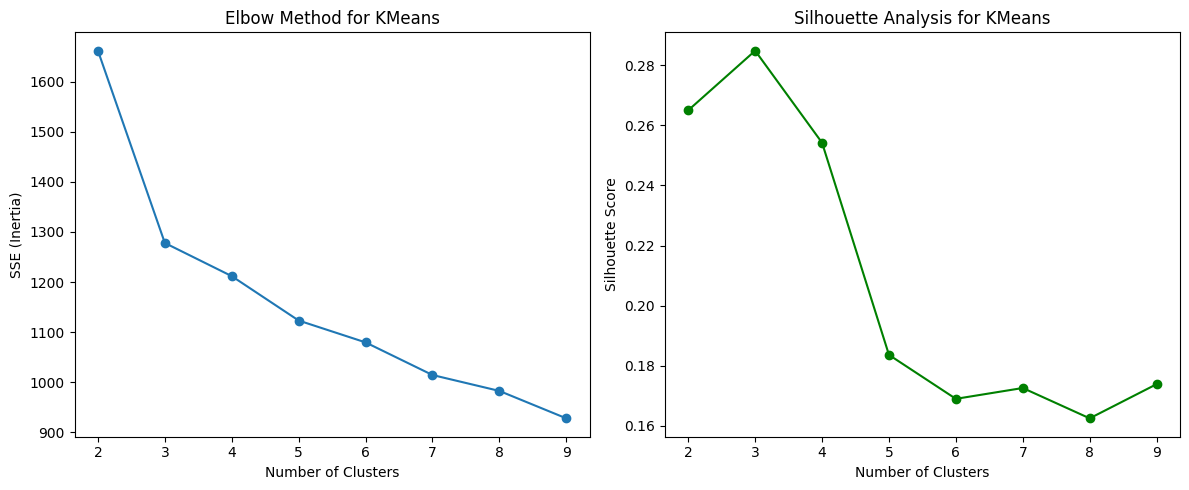

KMeans optimal cluster labels: [0 1 2]

Agglomerative Clustering:
 - 2 clusters: Silhouette Score = 0.267
 - 3 clusters: Silhouette Score = 0.277
 - 4 clusters: Silhouette Score = 0.226
 - 5 clusters: Silhouette Score = 0.187
 - 6 clusters: Silhouette Score = 0.180
 - 7 clusters: Silhouette Score = 0.187
 - 8 clusters: Silhouette Score = 0.188
 - 9 clusters: Silhouette Score = 0.192


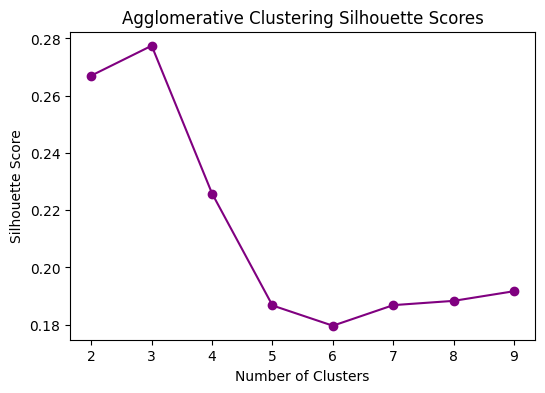

Agglomerative Clustering optimal cluster labels: [0 1 2]

Gaussian Mixture Models (GMM):
 - 1 components: BIC = 5741.30, AIC = 5410.40
 - 2 components: BIC = 5629.57, AIC = 4964.58
 - 3 components: BIC = 5842.33, AIC = 4843.25
 - 4 components: BIC = 5806.82, AIC = 4473.65
 - 5 components: BIC = 6463.00, AIC = 4795.75
 - 6 components: BIC = 6863.55, AIC = 4862.21
 - 7 components: BIC = 6917.55, AIC = 4582.12
 - 8 components: BIC = 6407.92, AIC = 3738.40
 - 9 components: BIC = 6448.66, AIC = 3445.05


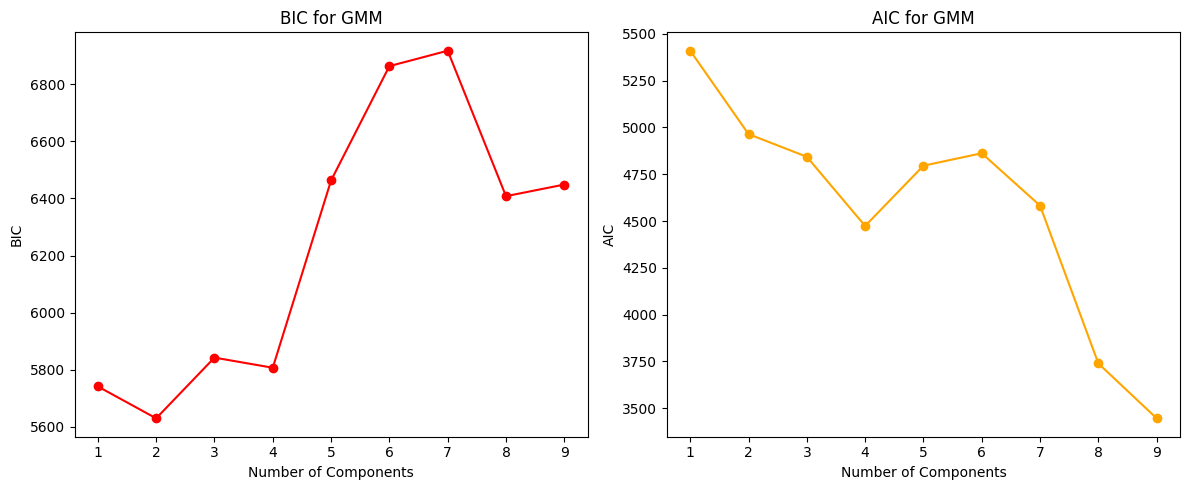

GMM optimal cluster labels: [0 1 2]


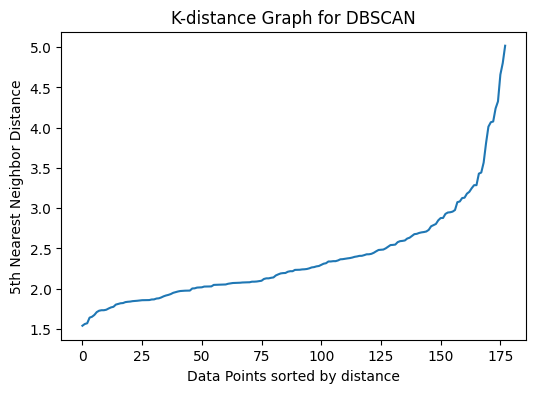

DBSCAN cluster labels (note: -1 indicates noise): [-1]

Summary of Clustering Results:
KMeans clusters: [0 1 2]
Agglomerative Clustering clusters: [0 1 2]
GMM clusters: [0 1 2]
DBSCAN clusters (with noise as -1): [-1]


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


sse = []
silhouette_scores = []
K_range = range(2, 10)

print("\nKMeans Clustering:")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)
    print(f' - {k} clusters: SSE = {kmeans.inertia_:.2f}, Silhouette = {sil_score:.3f}')


plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(K_range, sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Inertia)")
plt.title("Elbow Method for KMeans")

plt.subplot(1,2,2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for KMeans")
plt.tight_layout()
plt.show()


optimal_k = 3
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)
print("KMeans optimal cluster labels:", np.unique(kmeans_labels))


agg_silhouette_scores = []
print("\nAgglomerative Clustering:")
for k in K_range:
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    agg_silhouette_scores.append(sil_score)
    print(f' - {k} clusters: Silhouette Score = {sil_score:.3f}')

plt.figure(figsize=(6, 4))
plt.plot(K_range, agg_silhouette_scores, marker='o', color='purple')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Agglomerative Clustering Silhouette Scores")
plt.show()

optimal_k_agg = 3
agg_optimal = AgglomerativeClustering(n_clusters=optimal_k_agg)
agg_labels = agg_optimal.fit_predict(X_scaled)
print("Agglomerative Clustering optimal cluster labels:", np.unique(agg_labels))




bic_scores = []
aic_scores = []
n_components_range = range(1, 10)

print("\nGaussian Mixture Models (GMM):")
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bic = gmm.bic(X_scaled)
    aic = gmm.aic(X_scaled)
    bic_scores.append(bic)
    aic_scores.append(aic)
    print(f' - {n} components: BIC = {bic:.2f}, AIC = {aic:.2f}')

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(n_components_range, bic_scores, marker='o', color='red')
plt.xlabel("Number of Components")
plt.ylabel("BIC")
plt.title("BIC for GMM")

plt.subplot(1,2,2)
plt.plot(n_components_range, aic_scores, marker='o', color='orange')
plt.xlabel("Number of Components")
plt.ylabel("AIC")
plt.title("AIC for GMM")
plt.tight_layout()
plt.show()

optimal_components = 3
gmm_optimal = GaussianMixture(n_components=optimal_components, random_state=42)
gmm_labels = gmm_optimal.fit_predict(X_scaled)
print("GMM optimal cluster labels:", np.unique(gmm_labels))


neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4], axis=0)

plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.xlabel("Data Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-distance Graph for DBSCAN")
plt.show()


dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
print("DBSCAN cluster labels (note: -1 indicates noise):", np.unique(dbscan_labels))


print("\nSummary of Clustering Results:")
print("KMeans clusters:", np.unique(kmeans_labels))
print("Agglomerative Clustering clusters:", np.unique(agg_labels))
print("GMM clusters:", np.unique(gmm_labels))
print("DBSCAN clusters (with noise as -1):", np.unique(dbscan_labels))
